# Word-Embedding : An introduction to Word2Vec and Doc2Vec

**Welcome!**

In this notebook we first see an introduction about the concept of Distributional Semantic Models (DSM) and Word-Embedding and as we go on we'll learn about the Word2Vec and Doc2Vec algorithms and see how can we implement them in an ML task.

Please note that the main purpose of this notebook is to make familiar a beginner ML user with the mentioned concepts instead of focusing on the most efficient - or pythonic - way to write the code. There are several ways the codes you'll see here can be written in a better/more intelligent way but as a result, they may seem more complex to a non-expert Python coder. That's why I intentionally decided to not use Classes, decorators and tools like those.

## What is word-embedding?

Sometime between 50,000 years and 2 million years ago, humans started to talk and what we know today as "languages" is the result of this long process. 

The reason for it is rather simple: to be able to communicate about the world around them which directly impacts their lives. So, they create "representations" (which are not limited to words) to transfer an idea/concept/meaning to another human. While at the beginning these words/sounds/... were just independent symbols, by evolution of human language, words were also evolved not only as symbols but also as a way to link other concepts together. This process has happened during thousands of years, and during this period, human brain was unable to create a model of the reality, to link words(symbols) not just assign them to a single concept/idea but to understand their dynamics with the other symbols. So when I ask you ``give me a pair of scissors to cut this rope``, if you can't find scissors and instead see a knife you will probably bring it to me because in the model your brain has from the reality, scissors are used to cut, just as a knife. While at the first glance it may seem trivial, actually trying to replicate this phenomenon outside the human brain won't be so simple! before going in deep to see what options are out, let’s review how human brain deals with words:

<img src="Images/human_process.png" height="300" width="700">

To better grasp the concept of *creating representations*, let's take a look at a simple example:

Imagine we have a bunch of apples and for some reasons we want to find out the apples which are similar and dissimilar to each other:

<img src="Images/mele.png" height="300" width="700">

How, in your opinion we can represent an apple?

Let's say we decide to *represent* each one using these characteristic:
* Color
* Height
* Perimeter

<img src="Images/apple_table.png" height="300" width="400">

So now it's possible to show them in space, this means we just created a numerical representation for our apples!

<img src="Images/coor.jpeg" width="900">

What we did above is to get some _real-world_ objects and make a representation for them. Doing so we area able to find the _similar_ apples:

<img src="Images/apple_cluster.png" width="600">

 Now, imagine that we have to do the same thing but this time not for the entities with physical feature but for words...not so easy, right? ;)
We're lucky that we shouldn't start from the first step, mapping concepts/ideas to symbols. Human beings have done it for us during thousands of years!
Unfortunately having words is not enough for creating our model. To do so we need a numerical representation of textual data. Why we need such a representation you ask? well, to find out, just try to give the following paragraph to a classification algorithm, as it it, a text!

``Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.``


__Discussion__

How can we make a numerical representation for a text? Consider the following methods for creating numeric representation and try to discuss their disadvantages:

- Word frequency
- Word length
- One-Hot coding
- Word Similarity
- ?

It may be hard to believe but the first scientific regarding this question go back to 50s! Traditionally, researchers were using _count or frequency methods_ aiming to to capture the context pattern of words. Later these methods led to another group of methods : _prediction Based methods_ which simply put, is applying dimensional reduction algorithms  to a text corpus.
in 2013, _Mikolov_ and hist team in _Google_ proposed a new way to generate the distributional Semantic model : __word2vec__ algorithm.

Is Word2Vec is the only way to perform a word-embedding? of course not! as we said above there are decades researchers are working on this filed and you can find dozens of other methods in the literature. These methods can be grouped into two category:

* __Frequency Based Methods__
    * Count Vectors
    * TF-IDF
    * Co-Occurance Vectors
    * ...
* __Predication Based Methods__
    * Word2Vec
    * GloVe
    * Tyrion
    * ...

_Prediction Bases Methods are both more sophisticated and computationally expensive respect to Frequency Based Methods._

## What is the expected outcome of a Word2Vec model?

In a nutshell, a Vector!

To be more precise, a dense numerical vector with a pre-defined length.

<img src="Images/word2vec.png" height="300" width="700">

Simply put, a Word2Vec is just a simple neural network which performs a binary classification and uses the learned classifier weights as embeddings of words. All the classifier does is to return the probability of ___c___ being a context word for a target word ___t___. that's it!

A Word2Vec model, internally uses one of the following algorithms to create the embeddings:

* Continuous Bag Of Words (CBOW)
* Skip-Gram (SG)

## General mechanism of Word2Vec

Despite its immerse power, behind the scenes Word2Vec algorithm has a simple concept. Let's use an example to understand better the internal mechanism.
Before jumping to the example, we should emphasize one more time that the main assumption behind the following parts is the theory of meaning or as J.R.Firth puts it "You shall know a word by the company it keeps".
How can we achieve such a thing? to understand the complex relationship between words and their context.\\
Now let's go back to our simple example: Consider the left image in the following figure. Here we have a short text which contains words $A$ and $B$ (gray color). Now suppose that we find all the words that come immediately before and after our target words($A$ and $B$). We can see that these neighbours are almost the same (they are different combinations of $X$ and $Y$ ). In this case based on the meaning theory which we mentioned earlier we can conclude that $A$ and $B$ have a similar concept given that their contexts ($X$ and $Y$) are similar. On the contrary, analyzing context words of $A$ and $B$ in the image on the right, we notice that the contexts of $A$ and $B$ are not similar( at least not as they were in the previous case) so we can say that in this case $A$ and $B$ don't have a similar concepts/meaning.

<img src="Images/diff.png" height="700" width="700">

We have just seen an extremely simplified version of Word2Vec algorithm. Let's see what are the main differences between our example and the actual algorithm:

- **Length of text**: instead of dealing with a short document as in the example, Word2Vec usually performs on the large corpus of data.
- **context**: unlike what we saw in the example, the actual example doesn't consider two words immediately before and after the target word. Instead it considers a fixed window with a predefined length of preceding and following words respect to the target word.
- **Scope**: While in our simple example our goal was to check the similarity between two specific words, implementing Word2Vec algorithm, we create a vector representation for all tokens present in the corpus. These vectors later give us the possibility to perform further analysis like similarity and transformation as we will see later in detail.
- **Algorithm**: In the example we compared context of target words and based on the combination of context words we have decided that $A$ and $B$ are similar in the image on the left and not similar in the image one the right. Word2Vec on the other hand uses a different approach which is predicting the context from target and vice versa. Doing so it can understand which words have a similar context.(*CBOW* and *Skip-Gram algorithms*)

Now that we have seen a simplified example and its main differences with Word2Vec, let's see in more detail how actually Word2Vec works 

we need to have a large amount of textual data. It's important to notice these data are not a collection of individual words but a big set of sentences (corpus).Assuming that our corpus has $T$ words, we can address each word like this:
\[ t = 1,2,...,T\]
Next, we assume that each word in this limited vocabulary is re presentable by a vector and to start we assign each word a random vector. Iterating through all corpus, we pick each word (center word $w_{j}$) and assume that it (its representation in this case) should be able to predict its context. Context of each word are the words in a window with length of $m$ around it. We repeat these iterations hundreds of thousand of times , each time changing the representation in a way that the prediction will be better. We can summarize what we have said until now in the following formula which calculates the likelihood of our model:
$$L(\theta ) = \prod_{t=1}^{T} \prod_{-m\leqslant j\leqslant m} P(w_{t+j}\mid w_{t};\theta)$$
$$j\neq 0$$

$\boldsymbol{L}$: Model Likelihood or how good is our model in predicting context from center words

$\boldsymbol{\theta}$: Model variables we need to optimize. In our case the only variable we have in hand is the vector representations of words. It means the only thing that defines the performance of our probability model is are the vectors we come with for each word in the corpus.


$\boldsymbol{m}$: The window size for the context words around the center word

$\boldsymbol{P(w_{t+j}\mid w_{t};\theta)}$: Probability of having $w_{t+j}$ as a context word given the $w_{t}$ as center word and $\theta$ as vector representation.\\

While being able to calculate the model performance (model likelihood) for a certain $\theta$ is good, we need something that helps us with actually finding the best $\theta$. To do so we use a certain function called "objective function"(or loss function) which is a transformation of model likelihood. Doing such a transformation we will have $J(\theta)$ which we can look at it as *Error* we get, assigning vectors to words. It means by minimizing it we are getting the best vectors possible for each word. Let's take a look this transformation and examine the internal pieces: 
$$
J(\theta)=-\frac{1}{T}\log L(\theta) = -\frac{1}{T}\sum_{t=1}^{T}\sum_{-m\leqslant j\leqslant m}\log P(w_{t+j}\mid w_{t};\theta)
$$
$$j\neq 0$$

As we said before $J(\theta)$ is the transformed form of $L(\theta)$. Let's see what are the differences:

- Negative sign(-) : indicates that we want to minimize the objective function. (we can achieve the same result also with maximizing the objective function)
- $\frac{1}{T}$ : By adding it we calculate the Likelihood for every word in a corpus of $T$ words.
- log: using logarithm (a usual operator in optimization processes) we convert $\prod$ to $\sum$

Before talking about the last piece, $P(w_{t+j}\mid w_{t};\theta)$, let's summaries what we said until this point: Our final goal is to find vectors that can understand the meaning behind words and are able to discover the similarities between them. In order to find such vectors we have introduced a loss function which by minimizing it we achieve our primary goal. Minimizing this cost function means maximizing the total probability that our model is able to predict the correct context from each word.\\
Let's see a simple example: Imagine that we are dealing with a corpus with only 5 words and let's consider the window size as 1. so:
$$T=5\,\,\,and\,\,\,m=1$$

<img src="Images/w2v_schema.png" width=400>

So we can expand the loss function as:


\begin{equation*}
\begin{split}
L(\theta_{i}) & = -\frac{1}{5} \sum_{t=1}^{5}\sum_{-1\leqslant j\leqslant 1}\log P(w_{t+j}\mid w_{t}) \\
 & = -\frac{1}{5}(\log\,P(w_2\mid w_1)+ \\
 & \log P(w_1\mid w_2) + \log P(w_3\mid w_2)+\\
 & \log P(w_2\mid w_3) + \log P(w_4\mid w_3)+\\
 & \log P(w_3\mid w_4) + \log P(w_5\mid w_4)+\\
 & \log P(w_4\mid w_5) )
\end{split}
\end{equation*}

Ok, now let's talk about the elephant in the room, $P(w_{t+j}\mid w_{t};\theta)$!\
We said before that it is the probability of having a context word given the center word. But how can we calculate such a probability? As it can be seen, we are dealing with a conditional probability or more precisely, a probability distribution. Take another look at the result of the previous example. The last 5 lines show-for each word of 5 words - what is the probability of having such word given its context words ( lines one and five have just one expression since the only context of words 1 and 5 are respectively words 2 and 4). In order to calculate this probability, we can use a trick: Considering two different vector representations for each word based on its position, showing it with $v$ when it's a center word and mentioning it with $u$ when it's a context word. Having such assumption we can use the following formula:

$$P(o\mid c)=\frac{e^{u_{o}^{T}v_{c}}}{\sum_{w\in V}e^{u_{w}^{T}v_{c}}}$$
$u_{o}$: vector of context word\
$v_{c}$: vector of center word\
$u_{w}$: vector of a word not in a center position\
$P(o\mid c)$: Probability of having Outside word $o$ having center word $c$

What we see in this formula is combination of two things:
- Dot product of two vectors
- Softmax function

It means we can re-write our formula in the following way:

$$P(o\mid c) = Softmax(Probability(\textbf{o}\,\,being\,\,context\,\,for\,\textbf{c})) = Softmax(dot\,product(o.c))$$

**Dot-product**\
As we said before, a vector has two values. Dot product of two vectors (a scaler) reflects both magnitude and directions of both vectors:
$$a.b = \left | a \right |\times \left | b \right | \times \cos( \theta)$$
$\left | a \right |,\left | b \right |$: length(magnitude) of $a$ and $b$ vectors.\
$\theta$ : Angle between directions of $a$ and $b$ vectors.


Looking at the formula above it is quite easy to understand how the magnitude of vectors contribute to the outcome, the role of $\cos(\theta)$ might be less evident. We know that $\cos(\theta)$ should somehow reflect the angle between two vectors but there are two questions here:

- Why we need to use angle in the first place? why using vector lengths is not enough?
- How exactly $\cos(\theta)$ represents the angle? let's say, why not we use $sin(\theta)$ instead?


To answer the first question, let's first remind ourselves the goal of a dot-product: combining two vectors to obtain their product. So we can expect that having vectors as ingredients, we need to consider all their characteristics which as we mentioned before, are magnitude and direction. for example looking at the following simple example we can see that it's trivial to think that given that both vectors have the same directions it's possible to say that we can obtain the multiplication of these vectors by multiplying their lengths:


<img src="Images/simple_vectors.png" width="250" >

$$\left | a \right |\times \left | b \right |  $$\
But the things won't remain always as simple as we have seen above. Look at the this example:


<img src="Images/simple_cosine.png" width="400" >

The three vectors $\overrightarrow{a}, \overrightarrow{b}$ and $\overrightarrow{c}$ have the same length ($\left | a \right | = \left | b \right | = \left | c \right |$) but we in order to calculate $a.b$ or $a.c$ we can't just simply multiply their lengths because we can just to such a thing only if two vectors have the same direction. So, we need to somehow convert one of the vectors in a way to have the same direction as the other vector. The way we can achieve this is to use trigonometry $Cosine$ function. As you can see in the figure above, after converting  $\overrightarrow{b}$ and  $\overrightarrow{c}$ using $Cosine$ function we can see that $b.a$ will be greater than $c.a$.

<img src="Images/3d_cosine.png" width="600" >

The situation we face dealing with words will be quite different from the example above in 2 dimensional space.As we said before, even if we are going to use dense vectors instead of sparse outcome of one-hot encoding, the vector space still would be too complex to be visually demonstrated. In the figure above we see a 3-dimensional vector space with 3 vectors. Even without actually calculating dot products, we can almost certainly say that $a.b$ is greater than $a.c$ given that $\phi$ the angle between $a$ and $b$ is close to $90^{\circ}$ which brings $c.b$ close to zero. As a result, we can see that in our case of word vectors, we can expect that similar vectors have a greater dot product respect to the dissimilar vectors.
Back to our formula we can see that we have two parts indicating a dot product: $u_{o}^{T}v_{c}$ and $u_{w}^{T}v_{c}$ .As you can see we are using matrix transpose since we can't directly multiply two columns vectors. Following is the general form of dot product:

$$A^{T}B = 
\begin{bmatrix}
  A_1, A_2, \dots, A_n
\end{bmatrix}
\begin{bmatrix}
  B_1 \\ B_2 \\ \vdots \\ B_n
\end{bmatrix} = 
A_1 B_1 + A_2 B_2 + \vdots + A_n B_n = A.B
$$

**Softmax Function**\
Before, explaining the softmax function let's take a quick look at the equation we have started with: (Remember that its output should be a 


$$\frac{e^{\color{blue}u_{\color{blue}o}^\color{blue}{T}\color{blue}v_{\color{blue}c}}}{\sum_{w\in V}e^{\color{blue}u_{\color{blue}w}^\color{blue}{\color{blue}T}\color{blue}v_{\color{blue}c}}}$$

The blue parts are the pairwise dot-product of vectors as we have discussed in the previous part. Now we should explore the rest of the equation.
 What we see in the above equation is implementation of dot-products in the following function:

$$\sigma (z)_i =\frac{e^{z_{i}}}{\sum_{j=1}^{K}e^{z_{j}}} \,\,\,\,\,\,\,\,\,for\,\,i=1,\dots,K$$

 What we can infer from this function is that it's calculating some sort of proportion of total sum, something like this:


$$\frac{Something}{Sum(Everything)}$$

 The first thing  comes to mind is to use it to understand how dot-product of a certain word and a center word is different from dot-product of that word with other words of the corpus.Something like this:

$$\frac{Probability(A\,certain\,word\,being\,context\,of\,a\, specific\,word)}{Sum(Probability(A\,certain\,word\,being\,context\, of\,any\,other\,word\,in\,the\,corpus))}$$

 So maybe we can write a equation similar to this:

$$\frac{u_{o}^{T}v_{c}}{\sum_{w\in V}u_{w}^{T}v_{c}}$$

 The above equation gives us a vector with length of $V$ (our corpus) which each element is the following proportion:

$$\frac{dot-product(A\,certain\,word\,being\,context\,of\,a\, specific\,word)}{Sum(dot-product(A\,certain\,word\,being\,context\, of\,any\,other\,word\,in\,the\,corpus))}$$

Sounds great! There's just a small problem! Going back to the initial equation of likelihood, we should have had a probability part but What we get from the formula above is not a probability at all!
There are two problems:

- Sum of the items in the vector won't be equal to $1$.
- Each item is not necessarily between $0$ and $1$


 The reason is quite simple! The outcome of a dot-product is a "scaler", not a probability $(0\leqslant x\leqslant 1)$. So we need to somehow "transform" these scalers to probabilities. This is the reason in the initial formula we used $e$ to transform the scaler result of the dot products to a number between 0 and 1.

Ok, Until here, we saw all the pieces of Cost function one by one. or the last time let's summarize what we said until now and put these separate pieces together:

**Cost function should be minimized $\overset{so}{\Rightarrow}$
Individual probabilities should be maximized $\overset{so}{\Rightarrow}$
Word vectors should represent the relationship between words**


It means the only way we can minimize the cost function is to come up with a high probability for a a certain word being a context for another certain word, which in turn, means we should somehow find the correct vectors for words but the question is : How can we find such vectors? The answer - at least from conceptual point of view - is easy : Initiate each word with a random vector, calculate the Cost Function, change the vectors in a way that give a lower cost, calculate the cost and repeat these steps until the cost can't be go lower (you reach the global minimum for the cost). The following figure shows a simplistic representation of these steps:

We start with a random set of vectors ($\theta_{i}$) and use it to calculate the cost ($L(\theta_{i})$). Using a method called **gradient descent** (more on this later) we change the $\theta$ - little by little - until we get to the $\dot{\theta}$ which returns the minimum cost possible ($L(\dot{\theta})$).

<img src="Images/w2v_loss.png" width="400">

We see that using gradient descent, eventually we can arrive to the point (word vectors) which minimize the cost bu how gradient descent works? Simply put, it means taking small and directed(non-random) steps toward the minimum point from the starting point (which in our case was randomly generated). To take these steps we need to have to things:

- How big should be the step ($\alpha$)
- What should be the direction we move $\theta$ to

To understand these parameters, let's see the classic example of **gradient descent**: Imagine that you're a rock climber. You go to the bottom of a mountain, park your car and start climbing. after 6 hours,  you're somewhere near the top of a mountain but since it's getting dark (and you're tired), you decide to go down back to where you've parked your car. The problem is, there's a thick fog in the mountain and while you know your final destination is down (in our case, down means minimizing our cost function), you can't see the whole way until the destination point. So in this case you decide to choose a direction that seems right to you, take some steps, evaluate your position and choose another direction. Eventually by repeating these actions you'll(hopefully) get to your car. This is all \textbf{GD} does. Starting from a given initial point, it first calculates the partial depravities(A partial derivative shows you the direction of the point that makes the function minimum or maximum) then, using the step ($\alpha$) you've defined beforehand, it updates the $\theta$ and recalculates the cost. Repeating these steps we'll finish with the best set of vectors for the our corpus.

Now that we are familiar with the internal mechanism Word2Vec uses to calculate the word vectors, let's take a quick look at more detail on the tool it uses to  such vectors.

As you can remember we have said that Word2Vec "assigns random vectors to words and keeps modifying 
them until they produce the minimum cost possible". In order to do this procedure, Word2Vec uses 
Neural Networks. Neural Networks are one of the mostly used algorithms for a wide range of applications
from forecasting the stock prices to adding cat ears to your selfies. Here we won't go into detail of 
NN since doing so needs its own book(books?) and will takes us away from our goal but in order to 
have a general idea about NN let's take a look at it. Before jumping directly to NNs, let's start with
a simple example: Snake game. I this game you should guide the snake to the point having three rules:
 + You can choose between a Horizontal and vertical moves but not both at the same time
 + The snake should hit himself!

Now imagine a slightly different game:

- You can move Horizontally, Vertically, Diagonally.
- You can jump , disappear and re-appear
- You can mix the previous two moves together
- There are fixed and moving obstacles


As you can see the simple Snake game suddenly becomes much more harder as you should control more parameters
,face harsher obstacles and achieve a harder goal.
Now for the last time let's consider a different scenario: 

- We have 1,000,000 parameters to control
- You can combine all these parameters together and each combination has a different result
- Good luck!

Well, this time it seems we need something more than our fantastic human brains! That's where
Neural Networks come to help us. What a Neural Network does is to take hundreds or thousands 
(depending on the problem in hand) of solved cases and trying different parameters, find out the
them set of them which produce the less amount of error(or are closer to the correct cases.)
This is what happens inside the word2vec algorithm; as we gave it our corpus at it consider the position
of words as the correct neighbouring for the words. As a result and using Neural networks it returns
word vectors which represent these neighbouring.

## Training Methods

At the beginning of this notebook, we saw some of the difference our initial example had with the actual Word2Vec deliberately left out one important aspect as we weren't familiar with the maths behind the algorithm. This aspect is the **Training method**. We saw that in order to calculate the multi-class loss we should do the following calculation:

$$
J(\theta)=-\frac{1}{T}\log L(\theta) = -\frac{1}{T}\sum_{t=1}^{T}\sum_{-m\leqslant j\leqslant m}\log P(w_{t+j}\mid w_{t};\theta)
$$
$$j\neq 0$$

Which is calculated based on :
$$P(o\mid c)=\frac{e^{u_{o}^{T}v_{c}}}{\sum_{w\in V}e^{u_{w}^{T}v_{c}}}$$ 

The problem is that calculation of its denominator is computationally expensive. To resolve it, Word2Vec introduces two approximations, replacing multi-class loss with a set of binary logistic losses:
- Negative sampling
- Hierarchical Softmax

**Negative Sampling**:
We consider the words in our context as positive and all the words not a part of context of our target word as negative samples. 

**hierarchical Softmax**:
In hierarchical Softmax we represent every word as a set of codes (Calculated by a tree-based method caleld Huffman Tree) to calculate the probability for all words of the vocabulary.

Until now, in all examples we have used a specific case: predicting context words having the center word. This, called skip-gram- is one of the two internal algorithms Word2Vec can use. The other algorithm is called Continuous Bag Of Words (CBOW) which is when we try to predict the center word using the context words. While having a similar goal, these algorithms return slightly different vectors for words. It also means that the conditional probability formula we saw above will be modified accordingly:

$$P(c\mid o)=\frac{e^{h_{c}^{T}v_{o}}}{\sum_{w\in V}e^{h_{w}^{T}v_{o}}}$$ 
while $h_c$ is the sum of the words in the context:
$$h_c = \sum_{w\in V}x_c$$
**Skip-gram**: The input to the model is $w_i$, and the output is $w_{i-2},w_{i-1},w_{i+1},w_{i+2}$. So the task here is _"predicting the context given a word"_.(Works well with small amount of the training data, represents well even rare words or phrases)

__CBOW__: The input to the model is $𝑤_{𝑖−2},𝑤_{𝑖−1},𝑤_{𝑖+1},𝑤_{𝑖+2}$, the preceding and following words of the target word. The output of the neural network will be $𝑤_𝑖$. so the task is _"predicting the word given its context"_ (Several times faster to train than the skip-gram, slightly better accuracy for the frequent words)

<img src="Images/cbow_skipgram.png" height="300" width="800">

_Note : As a hyperparameter you should define the Max window size but don't forget that the algorithm won't necessarily use all the words in the window but instead it randomly choose some of the words based on the distance they have from the target word (in a way that closer words have a higher chance to be picked)_

Hopefuly, until here we have learned the math behind the Word2Vec algorithm. In order to perform the described calculations we need a Neural Network architecture which requires having a basic understanding of Neural Networks.
(In case you don't feel confident about NNs, take a look at [this](https://www.youtube.com/watch?v=aircAruvnKk&pbjreload=10) or [this](https://www.youtube.com/watch?v=BR9h47Jtqyw&t=1342s) videos.

<img src="Images/NN_1.png" height="300" width="800">

## Creating a Word2Vec model

Ok, now that we now som basic concepts about distributed semantic models and word2vec in specific, let's try to implement the latter with a real dataset.
The following diagram shows the general process we will follow in notebook
<img src="Images/process_2.png" height="300" width="1100">

## Requirements

This notebook is written in Python3 and needs the following libraries:

* **pandas** _(pip install pandas)_
* **numpy** _(python -m pip install --user numpy)_
* **gensim** _(pip install --upgrade gensim)_
* **tqdm** _(pip install tqdm)_
* **matplotlib** _(python -m pip install -U matplotlib)_
* **sklearn** _(pip install -U scikit-learn)_
* **SpaCy** _(python3 -m pip install spacy)_ --> python -m spacy download en
* **testfixtures** _(pip install testfixtures)_

To make sure which one you already have and which you should install, try to run the cell with the title **Loading libraries** and install the missing libraries accordingly.

<img src="Images/header.png" width="1200" >

To run practical examples I use the Simpsons [dataset from Kaggle](https://www.kaggle.com/pierremegret/dialogue-lines-of-the-simpsons/download)  which consists more that 150k lines and covers more than 600(old!) episodes.

### Loading libraries

In [1]:
import numpy as np
import spacy
import re
import os
import pandas as pd
import itertools
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import warnings
import umap.umap_ as umap # pip install umap-learn
import seaborn as sns

import gensim.parsing as gm
from gensim.parsing.preprocessing import preprocess_string
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import utils
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

### Defining some parameters

In [2]:
plt.rcParams['figure.figsize'] = (15, 10)
warnings.filterwarnings('ignore')

### Loading data from CSV file

In [3]:
df = pd.read_csv('./Datasets/simpsons_dataset.csv',
                sep=',').dropna().reset_index(drop=True)
df.sample(10)

,raw_character_text,spoken_words
64421,Marge Simpson,There's a happy baby. Aren't you? Aren't you?
55324,Ralph Wiggum,I wanna twirl.
27340,Homer Simpson,There. Done and done.
87432,Homer Simpson,All is well. Goodbye forever.
114944,Lisa Simpson,Then we heard a loud crash...we were tempted t...
79939,Butler,"....and Mister G. K. Willington, Esquire."
129599,Homer Simpson,Why you little --
114273,Homer Simpson,I hope our friend wasn't in an accident.
78979,C. Montgomery Burns,I just bought a new car. A nice foreign number...
92439,C. Montgomery Burns,Skinny dip!


### Pre-Processing

Just like any other ML task, we should start our work by preprocessing the data. To start let's use gensim's text processing tools to define a function. Consider that this function is created for this specific dataset. For example, it doesn't clean html tags, URLs,... since we know that they won't be present in our data. As you can see I commented out the stem_text function since we later use SpaCy to Lemmatize the text. (More on Lemmatization :
[Lemmatization Approaches with Examples in Python](https://www.machinelearningplus.com/nlp/lemmatization-examples-python/) )

In [5]:
def text_preproc(text: str):
    """Performs pre-processing steps on the given string.
    
    Pre-processing is done using methods from gensim module.
    Methods are hard-coded in the function.
    
    Args:
        text: A string
    
    Returns:
        A list with tokenized and Pre-processed tokens of the given string.
    """

    my_filter = [
        lambda x: x.lower(),
        gm.strip_punctuation,
        gm.strip_multiple_whitespaces,
        gm.strip_numeric,
        gm.remove_stopwords,
        gm.strip_short,
        gm.strip_tags,
        #gm.stem_text
    ]
    return preprocess_string(text, filters=my_filter)

In [6]:
# grabbing the column which contains the text
text_column = 'spoken_words'
data = df[text_column]

# passing texts to the function we defined above
training_set_raw = []
for d in tqdm_notebook(data, desc='Pre-Processing: Cleaning'):
    training_set_raw.append((text_preproc(d)))

# initialize spacy 'en' model
nlp = spacy.load('en', disable=['parser', 'ner'])

# creating sentences from tokens
training_sentence = [' '.join(d) for d in training_set_raw]

# lmmatizing sentences
training_set_0 = []
for ts in tqdm_notebook(training_sentence, desc='Pre-Processing: Lemmatizing'):
    doc = nlp(ts)
    lemm = [token.lemma_ for token in doc]
    if len(lemm) is not 0:
        training_set_0.append(lemm)
        
# removing duplicated data
training_set = []
for l in tqdm_notebook(training_set_0, desc='Pre-Processing: Deduplicating'):
    if l not in training_set:
        training_set.append(l)

In [21]:
# let's see the result of our pre-processing for the first 5 sentences
for i,j in zip(data[:5], training_set[:5]):
    print(f"-{i}\n-{' '.join(j)}")
    print('-'*40)

-No, actually, it was a little of both. Sometimes when a disease is in all the magazines and all the news shows, it's only natural that you think you have it.
-actually little disease magazine news show natural think
----------------------------------------
-Where's Mr. Bergstrom?
-bergstrom
----------------------------------------
-I don't know. Although I'd sure like to talk to him. He didn't touch my lesson plan. What did he teach you?
-know sure like talk touch lesson plan teach
----------------------------------------
-That life is worth living.
-life worth live
----------------------------------------
-The polls will be open from now until the end of recess. Now, just in case any of you have decided to put any thought into this, we'll have our final statements. Martin?
-poll open end recess case decide think final statement martin
----------------------------------------


### N-Grams

In this particular case we want to embed words using their neighbours, the words are frequently appear (or doesn't appear) close to them. Imagine that you want to calculate the occurrence probability of a set of three words : 
$$P(w_{1},w_{2},w_{3})$$
We can write it in this way:
$$P(w_{1},w_{2},w_{3}) = P(w_{1})P(w_{2}\mid w_{1})P(w_{3}\mid w_{1} w_{2})$$

The general form of this formula is named Chain Rule:

$$P(w_{1},w_{2},w_{3},...,w_{n}) = P(w_{1})P(w_{2}\mid w_{1})...P(w_{n}\mid w_{1}...w_{n-1})$$

$$or$$

$$P(w_{1}w_{2}...w_{i} )=\prod  P(w_{i}\mid w_{1} w_{2}...w_{i-1})$$

_if you're interested in this topic take a look at [this video](https://www.youtube.com/watch?v=dkUtavsPqNA
)_

Ok, let's calculate the bigrams for our sentences. To do so we use Phrases class from Gensim library. According to its documentation Phrases automatically detect common phrases – multi-word expressions / word n-grams – from a stream of sentences.

In [8]:
def create_ngrams(data: list, log: bool = True, n=2):
    """Creates ngrams(2-3) from the given list of tokenized and cleaned data.
    
    Args:
        data: a list of ([tokens], key) pairs.
        log: If True, it prints the status.
        
    Returns : 
        A Gensim Trigram object.
    """
    if log:
        print("Learning lexicon from files...")

    if log:
        print("Creating Bigrams...")
    ngrams = Phrases(data, min_count=30)
    
    if log:
        print("Bigrams are Ready.")
    if n ==3:
        if log:
            print("Creating Trigrams...")
        ngrams = Phrases(ngrams[data], min_count=10, threshold=2)
        if log:
            print("Trigrams are ready to use.")

    return ngrams

In [9]:
ngram = create_ngrams(training_set, n=2)

Learning lexicon from files...
Creating Bigrams...
Bigrams are Ready.


Let's take a look at our bigrams:

In [10]:
bb = Phrases(training_set, min_count=30)
for sent in training_set:
    bigrams_ = [b for b in bb[sent] if ' ' in b ]
    if bigrams_ != []:
        print(bigrams_)


['going to']


Oops! It seems the only bigram we got is **going to** !
Well this is not a good thing because:
1. It's almost impossible that **going to** is the only bigram in our dataset
2. Even if **going to** is the only bigram, it's not *useful* at all ! (*It lacks somethng called 'Informativeness'*)

Where this **going to** came from? According to documents of *gensim* library, they use *collection counts* to calculate bigrams which for several reasons is not a good idea, especially when we have a small dataset like ours.
Unfortunately the reason behind it and the better way to identify bigrams is out of scope of this notebook so for now, let's just use what we have.

In [12]:
def get_or_build_model(ngram: Phrases,
                       skipgram: int=0,
                       size: int=300,
                       window: int=2,
                       min_count: int=20,
                       alpha=0.03, 
                       negative=20,
                       hs: int=1,
                       ns_exponent = 0.05,
                       iter=10,
                       load: str=None,
                       save: str=None,
                       log: bool=True):
    
    """Build or if a saved model exists, load the model.

    Args: 
        ngram: ngram object created by create_ngrams() function.
        skipgram: internal algorithm used to create the model. 0=CBOW, 1=skipgram. [default = 0]
        size: Dimensionality of the word vectors.
        window: Maximum distance between the current and predicted word within a sentence.
        min_count: Ignores all words with total frequency lower than this.
        alpha: The initial learning rate
        hs: hierarchical softmax if 0 non-zero, negative sampling will be used.[default = 1]
        load: file path to the pre-built model to be loaded. If None, model will be created [default = None]
        save: file path to be used to save the created model. If None, model won't be saved locally [default = None]
        log: whether log messages should be printed for the use [default = True]
    
    Returns:
        A word2vec model
    """
    if log:
        print("Creating ngrams...")
    sentences = [ngram[pair] for pair in tqdm_notebook(training_set)]

    if load is not None:
        if log:
            print("Loading model...")
        model = Word2Vec.load(f"./{load}")
        if log:
            print("Model has been loaded successfully.")
    else:
        if log:
            print("Building Word2Vec...")
        model = Word2Vec(
            sentences,
            size=size,
            window=window,
            min_count=min_count,
            sg=skipgram,
            hs=hs,
            alpha=alpha, 
            negative=negative,
            ns_exponent = ns_exponent,
            iter=iter)
        if log:
            print("Model has been built.")
        if save is not None:
            if log:
                print("Saving the model...")
            model.save(f"./{save}")
            if log:
                print("Model has been saved successfully.")

    return model

In [13]:
# creating Word2Vec model
model = get_or_build_model(ngram)

Creating ngrams...



Building Word2Vec...
Model has been built.


### Cosine Similarity

Cosine similarity is the Cosine of two vectors A and B in a Way that if they are orthogonal to each other(not similarity) the Cosine will be 0 and in case they are equal, the Cosine would be equal to 1.

$$similarity\,score = cos(\theta ) = \frac{A \cdot B}{\left \| A  \right \| \left \| B  \right \|} =\frac{\sum_{i=1}^{n}A_{i}B_{i}}{\sqrt{\sum_{i=1}^{n}A_{i}^{2}} \sqrt{\sum_{i=1}^{n}B_{i}^{2}}}$$

Since Cosine similarity is one of the most important text similarity measures and has a pivotal role in text mining and NLP, let's suer that the idea behind it is clear. To better understand it, we can *turn* a bit the equation and look at the dot product:

$$a.b = \left | a \right |\times \left | b \right | \times \cos( \theta)$$

The above equation means : *to get the dot product of two vectors __a__ and __b__ you should consider the angele between them*

But why? let’s first remind ourselves the goal of a dot-product:combining two vectors to obtain their product. So we can expect that having vectors as ingredients, we need to consider all their characteristics which as we mentioned before, are magnitude and direction. for example looking at the following simple example we can see that it’s trivial to think that given that both vectors have the same directions it’s possible to say that we can obtain the multiplication of these vectors by multiplying their lengths:

But the things won’t remain always as simple as we have seen above. Look at the this example:

The three vectors $\overrightarrow{a}, \overrightarrow{b}$ and $\overrightarrow{c}$ have the same length ($\left | a \right | = \left | b \right | = \left | c \right |$) but we in order to calculate $a.b$ or $a.c$ we can't just simply multiply their lengths because we can just to such a thing only if two vectors have the same direction. So, we need to somehow convert one of the vectors in a way to have the same direction as the other vector. The way we can achieve this is to use trigonometry Cosine function. As you can see in the figure above, after converting  $\overrightarrow{b}$ and  $\overrightarrow{c}$ using Cosine function we can see that $b.a$ will be greater than $c.a$.

The situation we face dealing with words will be quite different from the example above in 2 dimensional space.As we said before, even if we are going to use dense vectors instead of sparse outcome of one-hot encoding, the vector space still would be too complex to be visually demonstrated. In the figure above we see a 3-dimensional vector space with 3 vectors. Even without actually calculating dot products, we can almost certainly say that $a.b$ is greater than $a.c$ given that $\phi$ the angle between $a$ and $b$ is close to $90^{\circ}$ which brings $c.b$ close to zero. As a result, we can see that in our case of word vectors, we can expect that similar vectors have a greater dot product respect to the dissimilar vectors.
Now that we're familiar with the dot product, we can *turn* the formula again and see it as:

$$cos(\theta ) = \frac{A \cdot B}{\left \| A  \right \| \left \| B  \right \|}$$

A really useful characteristic of $cos(\theta ) $ is that in this case, it will be a value between 0 and 1 with 0 showing the minimum and 1 the maximum similarity of two vectors. That's why we can use cosine similarity to calculate the similarity between two word vectors. In the following section we will see cosine similarity in action:

In [14]:
def n_most_similar(model: Word2Vec,
                   text: str,
                   n: int = 10):
    """Prints the n most similar words of the given string.

    Args:
        model : An object of Word2Vec class, created by get_or_build_model().
        text : the string we want to get it similar words.
        n : number of similar words we want to get [default = 10]        
    """

    most_similar_to = model.wv.most_similar(positive=[text], topn=n)
    for i, similar_item in enumerate(most_similar_to):
        similar_key = similar_item[0]
        score = str(round(float(similar_item[1]), 2))
        print(f"{i+1} - {similar_key} -- {score}")


Let's calculate the 10 most similar words to **Bart** character:

In [15]:
n_most_similar(model, text='bart', n=10)

1 - lisa -- 0.68
2 - eliza -- 0.49
3 - milhouse -- 0.49
4 - saxophone -- 0.44
5 - maggie -- 0.44
6 - badly -- 0.43
7 - principal_skinner -- 0.43
8 - scared -- 0.43
9 - abraham -- 0.42
10 - grampa -- 0.41


The results are really good considering not so large dataset we have in hand.
Now let's directly use **.doesnt_match** method of model vocabulary to see which of the given words doesn't belong to the rest of the words:

In [16]:
model.wv.doesnt_match(["nelson", "bart", "milhouse"])

'nelson'

In [17]:
model.wv.doesnt_match(["bart", "lisa", "milhouse"])

'milhouse'

### Visualization

How do you think we can visualize the results of our word-embedding model? the short answer is, we can't! :D
Simply because we are human beings and our brain can't comprehend an object which has more than 3 dimensions! _(reminder: in our example we've created 300-dimension vectors!)_

So what is the solution? Fortunately back in 2008 a smart guy named _Laurens van der Maaten_ came up with a method which can reduce a high-dimension model to a 2-3 dimension space.
This technique is called __t-SNE__ which stands for __t-Distributed Stochastic Neighbor Embedding__ . Explanation of t-SNE is way beyond the scope of this class but if you're interested in the topic, here is a nice video which explains how does it work:[link](https://www.youtube.com/watch?v=NEaUSP4YerM) 

_Note: Remember that getting a good result from t-SNE is not so easy! there are LOTS of parameters you can/should modify inside t-SNE function. [Here](https://distill.pub/2016/misread-tsne/) is a super-useful article with an interactive tool which helps you to play with parameters and discover their impact on the final results._

In [18]:
def plot_tsne(model,
              n_components: int=2,
              perplexity:int =20,
              learning_rate: int=10,
              n_iter: int=1000,
              metric: str='euclidean'):
    
    """t-SNE plot for word-embedding model.
    
    Args:
        n_components: Dimension of the embedded space.
        perplexity: The perplexity is related to the number of nearest neighbors that
            is used in other manifold learning algorithms. Larger datasets
            usually require a larger perplexity. 
        learning_rate: The learning rate for t-SNE is usually in the range [10.0, 1000.0].
            If the learning rate is too high, the data may look like a 'ball' with any
            point approximately equidistant from its nearest neighbours.
        n_iter: Maximum number of iterations for the optimization. Should be at least 250.
        metric: The metric to use when calculating distance between instances in a 
            feature array.
    """

    X = model[model.wv.vocab]
    # diminesion reduction from 300 to 50 with PCA
    X = PCA(n_components=50).fit_transform(X)

    tsne = TSNE(
        n_components=n_components,
        perplexity=perplexity,
        learning_rate=learning_rate,
        n_iter=n_iter,
        metric=metric)

    X_tsne = tsne.fit_transform(X)
    plt.figure(figsize=(13, 8))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=2, alpha=0.4)
    plt.title('t-SNE plot', fontsize=20)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [19]:
def plot_umap(model,
              n_components: int=2,
              n_neighbors:int =3,
              learning_rate: int=10,
              metric: str='cosine'):
    
    """UMAP plot for word-embedding model.
    
    Args:
        n_components: Dimension of the embedded space.
        metric: The metric to use when calculating distance between instances in a 
            feature array.
    """

    X = model[model.wv.vocab]
    reducer = umap.UMAP(n_neighbors=n_neighbors, metric=metric, learning_rate=learning_rate)
    X = model[model.wv.vocab]
    embedding = reducer.fit_transform(X)
    plt.scatter(embedding[:, 0], embedding[:, 1], s=5, alpha=0.5)
    plt.title('UMAP plot', fontsize=24)
    plt.show()

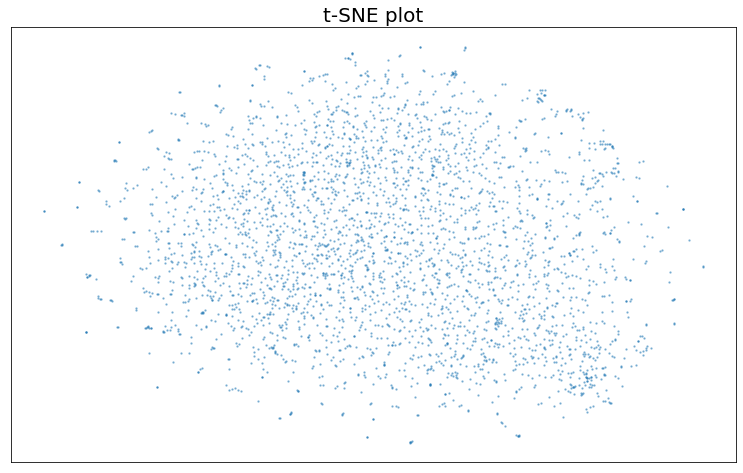

In [20]:
plot_tsne(model, perplexity=40, learning_rate=5)

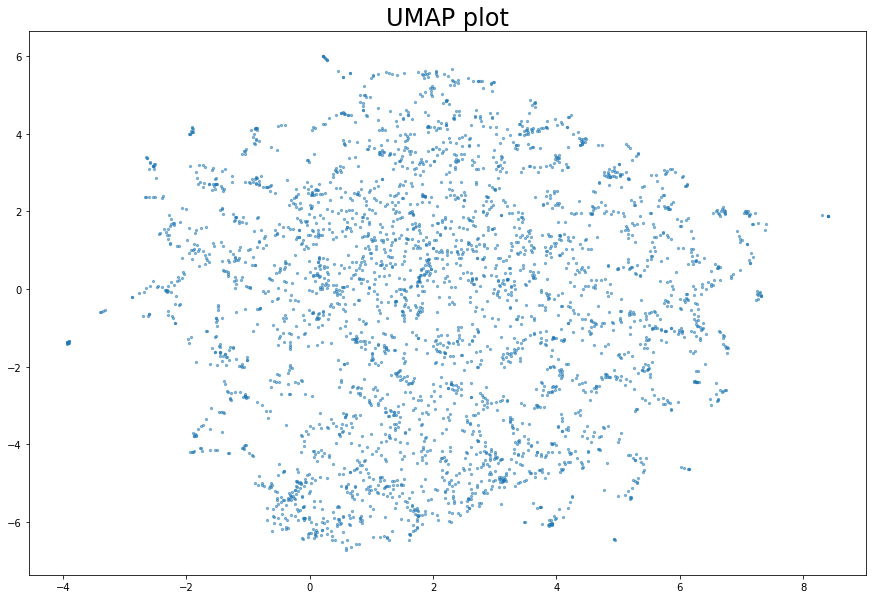

In [21]:
plot_umap(model)

In [22]:
def plot_tsne_top_n(model, word, n:int = 10):
    
    """t-SNE plot for top n similar words for the given input
    
    Args:
        model : An object of Word2Vec class, created by get_or_build_model().
        word : the string we want to plot similar words for
        n : number of similar words we want to get [default = 10]   
    """
    
    X = model[model.wv.vocab]
    tsne = TSNE(n_components=2,
                  perplexity=20,
                  learning_rate=10,
                  n_iter=1000,
                  metric='euclidean')

    X_tsne = tsne.fit_transform(X)

    tsne_df = pd.DataFrame([X_tsne[:, 0], X_tsne[:, 1]]).T
    tsne_df.columns = ['X', 'Y']

    tsne_df['words'] = model.wv.vocab.keys()

    top = [x[0] for x in model.wv.most_similar(positive=[word], topn=n)]


    df_point = tsne_df[tsne_df.words == word].reset_index(drop=True)
    df_1 = tsne_df[tsne_df.words.isin(top)].reset_index(drop=True)
    plt.scatter(df_1.X, df_1.Y)
    plt.scatter(df_point.X, df_point.Y, c='r')
    for i in range(len(df_1)):
        plt.text(df_1.X[i], df_1.Y[i], df_1.words[i])
    plt.text(df_point.X[0], df_point.Y[0], df_point.words[0], horizontalalignment='center')
    plt.title(f'Top {n} words for {word}', fontsize=20)
    plt.show()

In [23]:
def plot_umap_top_n(model, word, n:int = 10):
    
    """UMAP plot for top n similar words for the given input
    
    Args:
        model : An object of Word2Vec class, created by get_or_build_model().
        word : the string we want to plot similar words for
        n : number of similar words we want to get [default = 10]   
    """
    
    X = model[model.wv.vocab]
    reducer = umap.UMAP()
    X_tsne = reducer.fit_transform(X)


    tsne_df = pd.DataFrame([X_tsne[:, 0], X_tsne[:, 1]]).T
    tsne_df.columns = ['X', 'Y']

    tsne_df['words'] = model.wv.vocab.keys()

    top = [x[0] for x in model.wv.most_similar(positive=[word], topn=n)]


    df_point = tsne_df[tsne_df.words == word].reset_index(drop=True)
    df_1 = tsne_df[tsne_df.words.isin(top)].reset_index(drop=True)
    plt.scatter(df_1.X, df_1.Y)
    plt.scatter(df_point.X, df_point.Y, c='r')
    for i in range(len(df_1)):
        plt.text(df_1.X[i], df_1.Y[i], df_1.words[i])
    plt.text(df_point.X[0], df_point.Y[0], df_point.words[0], horizontalalignment='center')
    plt.title(f'Top {n} words for {word}', fontsize=20)
    plt.show()

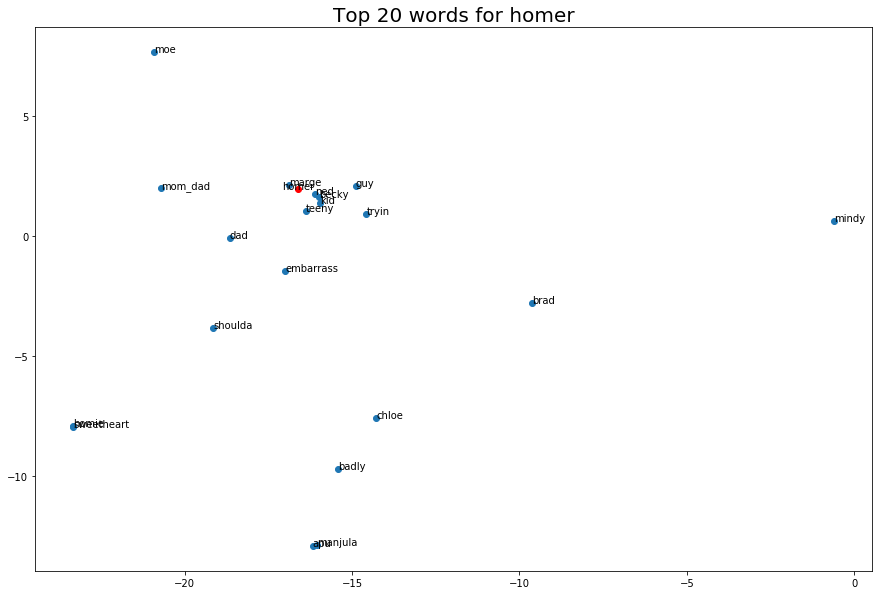

In [104]:
plot_tsne_top_n(model, 'homer', n=20)

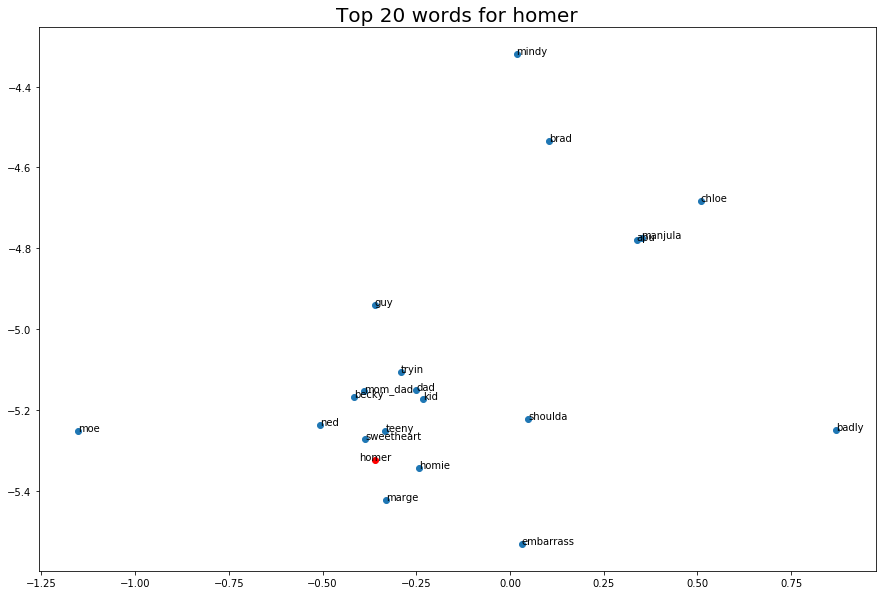

In [108]:
plot_umap_top_n(model, 'homer', n=20)

## Doc2Vec Algorithm

Hopefully now that you know the concept of word embeddings and Word2Vec algorithm, it's much more easier to talk about Doc2Vec.

Doc2Vec is a generalization of a Word2Vec algorithm which not only takes into consideration the context of words, but also takes into account the context of the the document as a whole.

In the doc2vec architecture, the two algorithm that are **“continuous bag of words” (CBOW)** and **“skip-gram” (SG)**; correspond to the **“distributed memory” (DM)** and **“distributed bag of words” (DBOW)**.

The following figure shows how  Word2Vec integrates the Cocument ID into the context:


<img src="Images/doc2vec.jpg" height="300" width="800">

### Data preparation

While in Word2Vec example we used embeddings to create a visulization, in case of Doc2Vec we try to create a simple classifier which given a sentence can predict who's sentence is that!

To do so we need to do a further step: **Balancing the data**

In [109]:
# normalizing the names
df['raw_character_text'] = [x.lower().strip() for x in df['raw_character_text']]

In [110]:
df.raw_character_text.value_counts()[:4]

homer simpson    27850
marge simpson    13172
bart simpson     12995
lisa simpson     10756
Name: raw_character_text, dtype: int64

As you can see **Lisa** has the lowest lines : 10756 . One way to balance the data is down sample others to Lisa level:

In [111]:
data_ho = df[df.raw_character_text == 'homer simpson'].sample(10756)
data_ma = df[df.raw_character_text == 'marge simpson'].sample(10756)
data_ba = df[df.raw_character_text == 'bart simpson'].sample(10756)
data_li = df[df.raw_character_text == 'lisa simpson']

Now we should individually divide data for each character to train and test and then combine them together.

In [112]:
data_ho_test = data_ho.sample(3226)
data_ho_train = data_ho[~data_ho.index.isin(data_ho_test.index)]

In [113]:
data_ma_test = data_ma.sample(3226)
data_ma_train = data_ma[~data_ma.index.isin(data_ma_test.index)]

In [114]:
data_ba_test = data_ba.sample(3226)
data_ba_train = data_ba[~data_ba.index.isin(data_ba_test.index)]

In [115]:
data_li_test = data_li.sample(3226)
data_li_train = data_li[~data_li.index.isin(data_li_test.index)]

In [116]:
# Training data
data_train = pd.concat([data_ho_train, data_ma_train, data_ba_train, 
                      data_li_train]).reset_index(drop=True)

In [117]:
# Testing data
data_test = pd.concat([data_ho_test, data_ma_test, data_ba_test, 
                      data_li_test]).reset_index(drop=True)

In [118]:
# Tagging each document with its label
train_tagged = data_train.apply(lambda x: TaggedDocument(words=text_preproc(x['spoken_words']), tags=[x.raw_character_text]), axis=1)
test_tagged = data_test.apply(lambda x: TaggedDocument(words=text_preproc(x['spoken_words']), tags=[x.raw_character_text]), axis=1)

In [119]:
# an example
train_tagged.values[42]

TaggedDocument(words=['princess', 'coat', 'obviously', 'cold', 'escort', 'radiator'], tags=['homer simpson'])

As we mentioned before, in order to create a Doc2Vec model we have two options. Let's start from DBOW model:

In [120]:
# Inizializing the Doc2Vec model and creating the vocabulary
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=30, hs=0, min_count=6)
model_dbow.build_vocab([x for x in tqdm_notebook(train_tagged.values)])

In [121]:
# training the model in 30 epochs
for epoch in tqdm_notebook(range(30), desc= 'Training model'):
    model_dbow.train(utils.shuffle([x for x in train_tagged.values]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

In [122]:
def labeled_vectors(model:Doc2Vec,
                     tagged_docs:pd.core.series.Series):
    """Tagged vectors for the given model and documnets
    
    Args:
        model: trained Doc2Vec model
        tagged_docs: A pandas.Series which contains tagged documenst with their labels
        
    Returns:
        labels and vectors for the giben documents
        
    """
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [123]:
y_train, X_train = labeled_vectors(model_dbow, train_tagged)
y_test, X_test = labeled_vectors(model_dbow, test_tagged)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(f'Accuracy: {round(accuracy_score(y_test, y_pred), 4)}')
print(f'F1 score: {round(f1_score(y_test, y_pred, average="weighted"),4)}')

Accuracy: 0.2739
F1 score: 0.2704


In [124]:
model_dm = Doc2Vec(dm=1, window=3, vector_size=300, negative=30, min_count=6,alpha=0.1, min_alpha=0.1)
model_dm.build_vocab([x for x in train_tagged.values])

In [125]:
# training the model in 30 epochs
for epoch in tqdm_notebook(range(30), desc= 'Training model'):
    model_dm.train(utils.shuffle([x for x in train_tagged.values]), total_examples=len(train_tagged.values), epochs=1)
    model_dm.alpha -= 0.002
    model_dm.min_alpha = model_dm.alpha

In [126]:
y_train, X_train = labeled_vectors(model_dm, train_tagged)
y_test, X_test = labeled_vectors(model_dm, test_tagged)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(f'Accuracy: {round(accuracy_score(y_test, y_pred), 4)}')
print(f'F1 score: {round(f1_score(y_test, y_pred, average="weighted"),4)}')

Accuracy: 0.3845
F1 score: 0.384


According to creators of gensim library combining a paragraph vector from Distributed Bag of Words (DBOW) and Distributed Memory (DM) improves performance. So le't do it first by deleting training data of **model_dbow** and **model_dm** to free up the momory:

In [127]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

# concatenating models
new_model = ConcatenatedDoc2Vec([model_dbow, model_dm])

In [128]:
y_train, X_train = labeled_vectors(new_model, train_tagged)
y_test, X_test = labeled_vectors(new_model, test_tagged)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(f'Accuracy: {round(accuracy_score(y_test, y_pred), 4)}')
print(f'F1 score: {round(f1_score(y_test, y_pred, average="weighted"),4)}')

Accuracy: 0.3865
F1 score: 0.3856


The results are way better than before but still can't be considered as good results. The biggest problem is the size of the training data. Another one reason may be the way we have addressed the _unbalanced_ data. A better way to do so would be using a method like __SMOTE__ to do the under or over sampling.

## Sources

* [Distributed Representations of Words and Phrases and their Compositionality (Milkov et al)](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)
* [Gensim documentation](https://radimrehurek.com/gensim/index.html)
* [RaRe-Technologies Github Page](https://github.com/RaRe-Technologies/gensim/blob/3c3506d51a2caf6b890de3b1b32a8b85f7566ca5/docs/notebooks/doc2vec-IMDB.ipynb)
* [Multi-Class Text Classification with Doc2Vec & Logistic Regression by Susan Li](https://towardsdatascience.com/multi-class-text-classification-with-doc2vec-logistic-regression-9da9947b43f4)
* [Gensim Word2Vec Tutorial by Pierre Megret](https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial)
* [An Artificial Language Evaluation of Distributional Semantic Models](https://www.aclweb.org/anthology/K17-1015.pdf)